<h2>Analyzing Trends and Patterns in Electric Power Consumption Data</h2>
<hr style="border: none; height: 4px; background: linear-gradient(to right, cyan, lightblue); margin: 20px 0;">


Name: **Jade Rohjan V. Tavera** <br>
Course: **CPE2A**

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [541]:
df = pd.read_csv(r"C:\\Users\\Admin\\Documents\\GitHub\\MATHEDA\\Endterm\\Raw\\Electric Power Consumption.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                1508 non-null   object 
 1   Temperature             1532 non-null   float64
 2   Humidity                1507 non-null   float64
 3   WindSpeed               1508 non-null   float64
 4   GeneralDiffuseFlows     1521 non-null   float64
 5   DiffuseFlows            1518 non-null   float64
 6   PowerConsumption_Zone1  1527 non-null   float64
 7   PowerConsumption_Zone2  1519 non-null   float64
 8   PowerConsumption_Zone3  1510 non-null   float64
dtypes: float64(8), object(1)
memory usage: 112.6+ KB


## Dropping Rows With Null Values

In [542]:
dropped_rows = df[df.isnull().any(axis=1)]
df = df.dropna()
dropped_rows

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,NaN,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,NaN,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
4,NaN,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,NaN
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,NaN,24777.72152,16227.35562,17025.54217
...,...,...,...,...,...,...,...,...,...
1591,1/12/2017 1:10,NaN,71.2,0.086,NaN,NaN,25336.70886,15796.96049,15770.60241
1593,1/12/2017 1:30,10.610,72.5,0.085,0.084,0.130,24346.32911,NaN,15203.85542
1595,1/12/2017 1:50,9.620,76.8,0.083,0.081,NaN,23793.41772,14786.62614,14932.04819
1597,1/12/2017 2:10,10.190,75.8,NaN,0.084,0.137,23471.39241,14392.70517,14781.68675


## Data Overview

In [543]:
from IPython.display import display

display(df.describe())
display(df.dtypes.to_frame(name="Data Type")) 

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,12.521632,71.912210,0.097862,105.467163,42.371004,30336.821783,19203.407504,17588.966679
std,3.442944,9.775732,0.277597,160.667798,71.865339,7141.478556,4497.481361,4417.179474
min,4.212000,44.170000,0.068000,0.015000,0.056000,18075.949370,10949.544070,10039.518070
25%,9.840000,65.320000,0.076000,0.062000,0.122000,23617.215190,15089.361700,14330.602410
50%,13.330000,73.300000,0.080000,0.088000,0.171000,30483.037970,19597.568390,16360.481930
75%,15.220000,79.000000,0.085000,186.600000,50.570000,34426.329110,21822.492400,19922.891570
max,19.480000,88.900000,4.924000,574.000000,390.600000,44627.848100,27527.051670,26533.012050


,Data Type
Datetime,object
Temperature,float64
Humidity,float64
WindSpeed,float64
GeneralDiffuseFlows,float64
DiffuseFlows,float64
PowerConsumption_Zone1,float64
PowerConsumption_Zone2,float64
PowerConsumption_Zone3,float64


## Descriptive Statistics Summary

In [544]:
numerical_summary = pd.DataFrame({
    'Mean': df.drop(columns=['Datetime']).mean(),
    'Median': df.drop(columns=['Datetime']).median(),
    'Min': df.drop(columns=['Datetime']).min(),
    'Max': df.drop(columns=['Datetime']).max(),
    'Std Dev': df.drop(columns=['Datetime']).std()
})

numerical_summary

,Mean,Median,Min,Max,Std Dev
Temperature,12.521632,13.33000,4.21200,19.48000,3.442944
Humidity,71.912210,73.30000,44.17000,88.90000,9.775732
WindSpeed,0.097862,0.08000,0.06800,4.92400,0.277597
GeneralDiffuseFlows,105.467163,0.08800,0.01500,574.00000,160.667798
DiffuseFlows,42.371004,0.17100,0.05600,390.60000,71.865339
PowerConsumption_Zone1,30336.821783,30483.03797,18075.94937,44627.84810,7141.478556
PowerConsumption_Zone2,19203.407504,19597.56839,10949.54407,27527.05167,4497.481361
PowerConsumption_Zone3,17588.966679,16360.48193,10039.51807,26533.01205,4417.179474


## Time Range Covered in the Dataset:

In [545]:
start_date = df['Datetime'].min()
end_date = df['Datetime'].max()

print(f"Time Range Covered in the Dataset:")
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Time Range Covered in the Dataset:
Start Date: 1/1/2017 0:20
End Date: 1/9/2017 9:50


## Converting and Setting DateTime as Index in DataFrame

In [546]:
if 'Datetime' not in df.index.names:
	df['Datetime'] = pd.to_datetime(df['Datetime'])
	df.set_index('Datetime', inplace=True)

## Plot Power Consumption Over Time

In [547]:
print(df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].head(10))

                     PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                              
2017-01-01 00:20:00             29128.10127             19006.68693   
2017-01-01 00:30:00             28228.86076             18361.09422   
2017-01-01 01:00:00             25998.98734             16993.31307   
2017-01-01 01:10:00             25446.07595             16661.39818   
2017-01-01 02:10:00             22329.11392             14710.03040   
2017-01-01 02:30:00             21903.79747             14104.55927   
2017-01-01 02:50:00             21484.55696             13612.15805   
2017-01-01 03:20:00             20870.88608             13196.35258   
2017-01-01 03:30:00             20870.88608             13167.17325   
2017-01-01 04:10:00             20482.02532             13032.21884   

                     PowerConsumption_Zone3  
Datetime                                     
2017-01-01 00:20:00             19668.43373  
2017-01-0

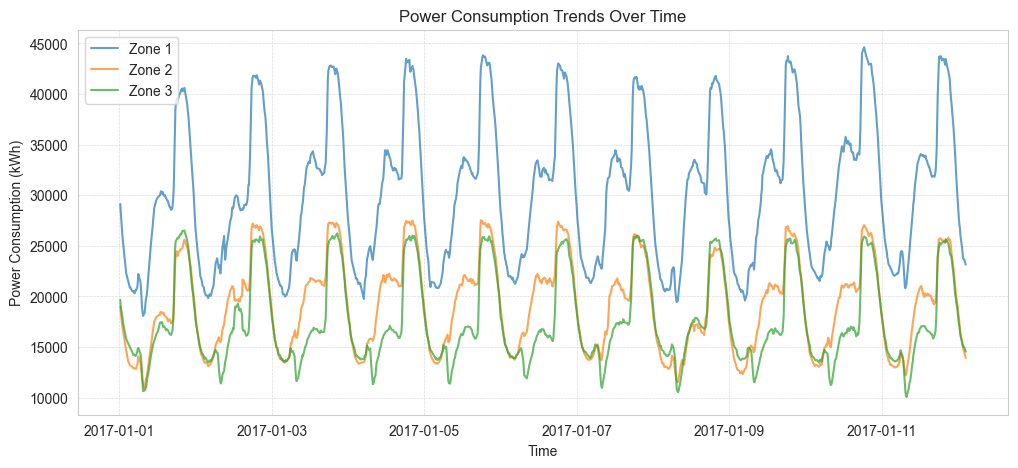

In [548]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']], alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Power Consumption (kWh)")
plt.title("Power Consumption Trends Over Time")
plt.legend(["Zone 1", "Zone 2", "Zone 3"])

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_axisbelow(True)  

plt.show()


## Daily, Weekly, and Monthly Trends

Daily Averages Table

In [549]:
df_daily = df.resample('D').mean()

print(df_daily[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].head(10).to_string(index=True)) 

            PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3
Datetime                                                                          
2017-01-01            28351.861685            17633.790496            17791.877755
2017-01-02            29198.203348            19741.268752            17911.356394
2017-01-03            30522.755496            19998.093105            17675.809766
2017-01-04            31102.996762            20326.797201            17832.087419
2017-01-05            30845.360105            20081.668589            17498.030744
2017-01-06            30921.693584            20248.150089            17726.032406
2017-01-07            30946.546112            19400.303951            17846.127366
2017-01-08            28984.053478            16900.283460            17504.957357
2017-01-09            30929.620253            19312.773026            17659.131409
2017-01-10            31239.140417            19052.067576            17022.650602


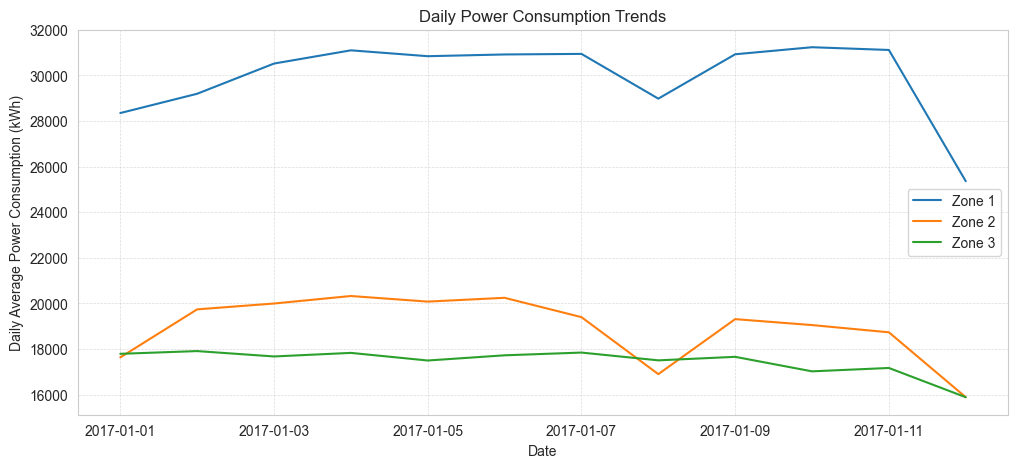

In [550]:
df_daily = df.resample('D').mean()

plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])

plt.xlabel("Date")
plt.ylabel("Daily Average Power Consumption (kWh)")
plt.title("Daily Power Consumption Trends")
plt.legend(["Zone 1", "Zone 2", "Zone 3"])

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  
plt.gca().set_axisbelow(True)  

plt.show()

Weekly Averages Table

In [551]:
df_weekly = df.resample('W').mean()
print(df_weekly[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].head(10).to_string(index=True))

            PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3
Datetime                                                                          
2017-01-01            28351.861685            17633.790496            17791.877755
2017-01-08            30342.635602            19527.063419            17713.408998
2017-01-15            30926.289733            18935.697399            17241.124498


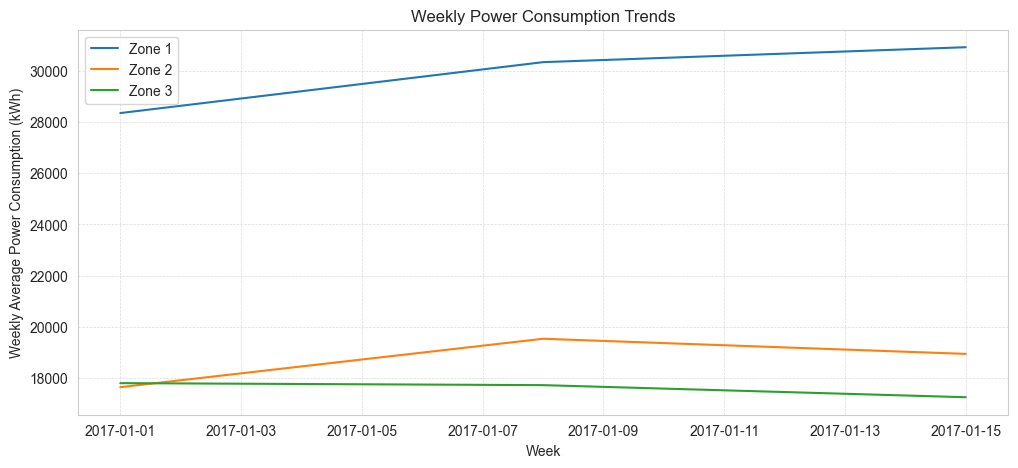

In [552]:
df_weekly = df.resample('W').mean()

plt.figure(figsize=(12, 5))

plt.plot(df_weekly.index, df_weekly['PowerConsumption_Zone1'], color='tab:blue', label="Zone 1")
plt.plot(df_weekly.index, df_weekly['PowerConsumption_Zone2'], color='tab:orange', label="Zone 2")
plt.plot(df_weekly.index, df_weekly['PowerConsumption_Zone3'], color='tab:green', label="Zone 3")

plt.xlabel("Week")
plt.ylabel("Weekly Average Power Consumption (kWh)")
plt.title("Weekly Power Consumption Trends")

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  
plt.gca().set_axisbelow(True)  
plt.show()

Monthly Averages Table

In [553]:
df_monthly = df.resample('ME').mean()
print(df_monthly[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].head(10).to_string(index=True))

            PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3
Datetime                                                                          
2017-01-31            30336.821783            19203.407504            17588.966679


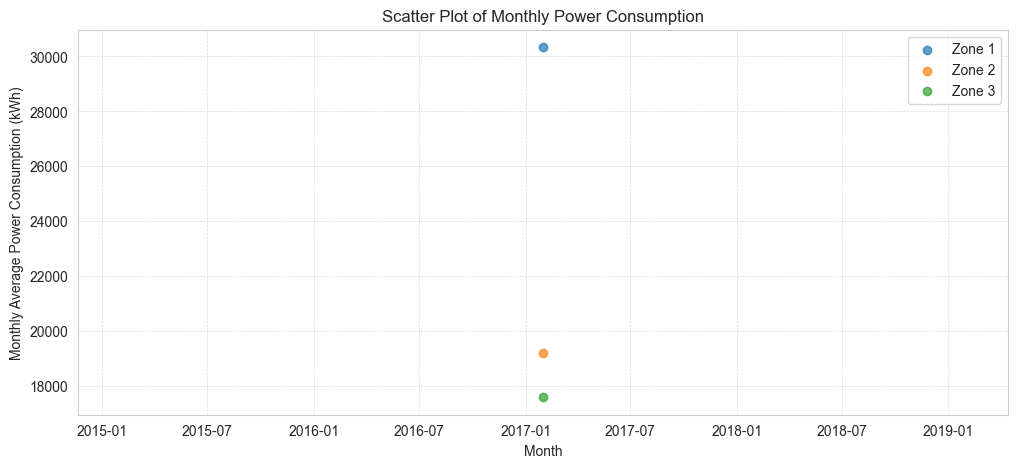

In [554]:
df_monthly = df.resample('ME').mean()

plt.figure(figsize=(12, 5))

plt.scatter(df_monthly.index, df_monthly['PowerConsumption_Zone1'], label="Zone 1", color='tab:blue', alpha=0.7)
plt.scatter(df_monthly.index, df_monthly['PowerConsumption_Zone2'], label="Zone 2", color='tab:orange', alpha=0.7)
plt.scatter(df_monthly.index, df_monthly['PowerConsumption_Zone3'], label="Zone 3", color='tab:green', alpha=0.7)

plt.xlabel("Month")
plt.ylabel("Monthly Average Power Consumption (kWh)")
plt.title("Scatter Plot of Monthly Power Consumption")

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  
plt.gca().set_axisbelow(True) 

plt.show()


## Correlation Analysis

Correlation Matrix Calculation

In [555]:
correlation_matrix = df.corr()
print(correlation_matrix)

                        Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
Temperature                1.000000 -0.746822  -0.089262             0.462638   
Humidity                  -0.746822  1.000000  -0.028130            -0.658087   
WindSpeed                 -0.089262 -0.028130   1.000000             0.087650   
GeneralDiffuseFlows        0.462638 -0.658087   0.087650             1.000000   
DiffuseFlows               0.505360 -0.597400   0.021228             0.581689   
PowerConsumption_Zone1     0.451342 -0.305789  -0.022400             0.154952   
PowerConsumption_Zone2     0.405588 -0.267192  -0.028221             0.163763   
PowerConsumption_Zone3     0.306964 -0.108448  -0.035029            -0.148434   

                        DiffuseFlows  PowerConsumption_Zone1  \
Temperature                 0.505360                0.451342   
Humidity                   -0.597400               -0.305789   
WindSpeed                   0.021228               -0.022400   
GeneralDiffuse

Visualizing the Correlation Matrix (Heatmap)

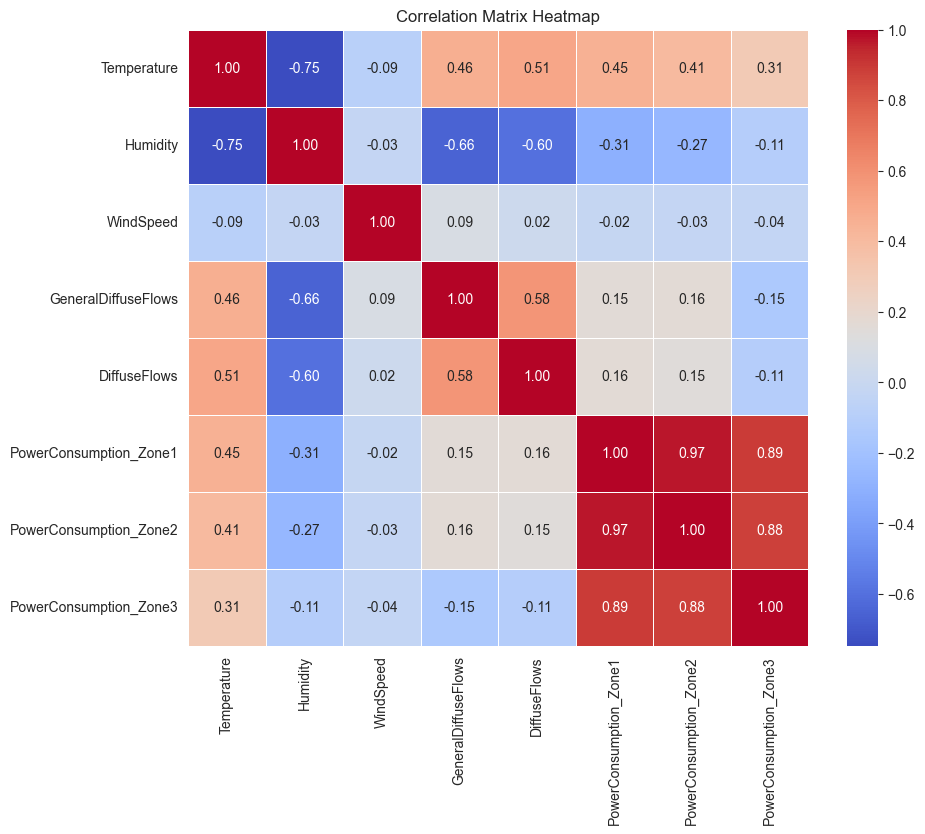

In [556]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Weather vs. Power Consumption

Scatter Plots for Weather Variables vs. Power Consumption

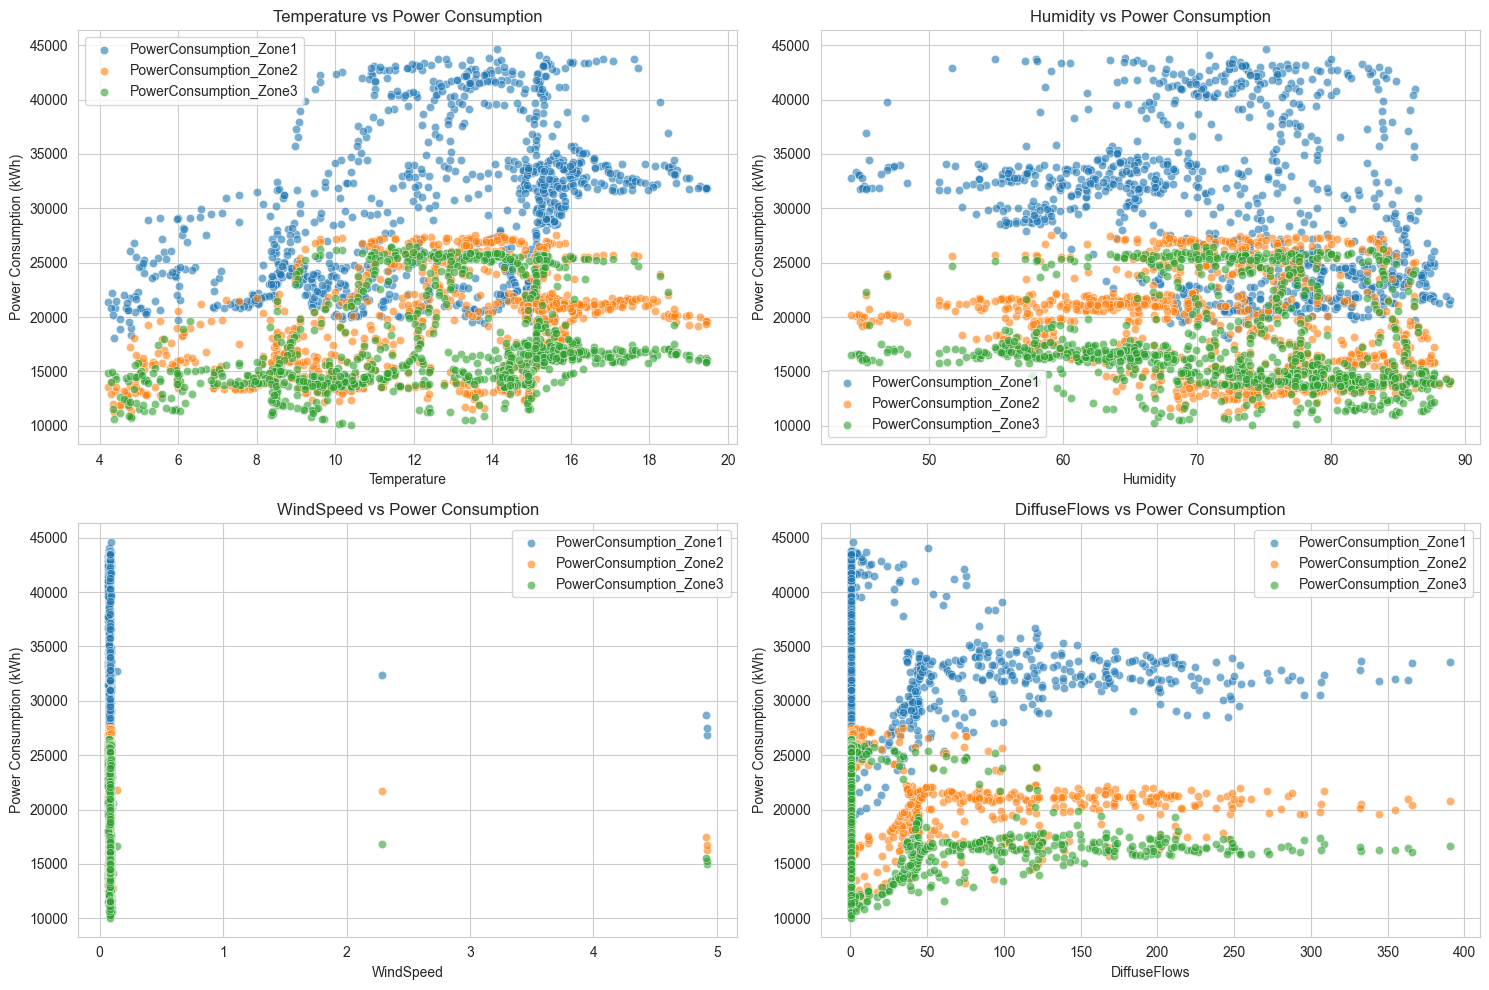

In [557]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# List of weather variables and their labels
weather_factors = ["Temperature", "Humidity", "WindSpeed", "DiffuseFlows"]
zones = ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]

# Create scatter plots for each weather factor vs power consumption
for i, factor in enumerate(weather_factors, 1):
    plt.subplot(2, 2, i)
    for zone in zones:
        sns.scatterplot(x=df[factor], y=df[zone], alpha=0.6, label=zone)
    plt.title(f"{factor} vs Power Consumption")
    plt.xlabel(factor)
    plt.ylabel("Power Consumption (kWh)")
    plt.legend()

plt.tight_layout()
plt.show()

## Regression Plots for Deeper Insight

# Zone 1

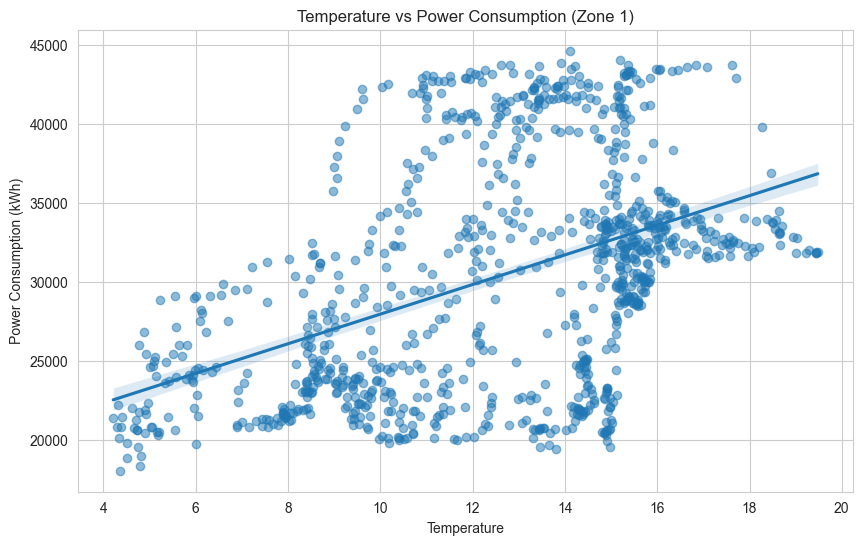

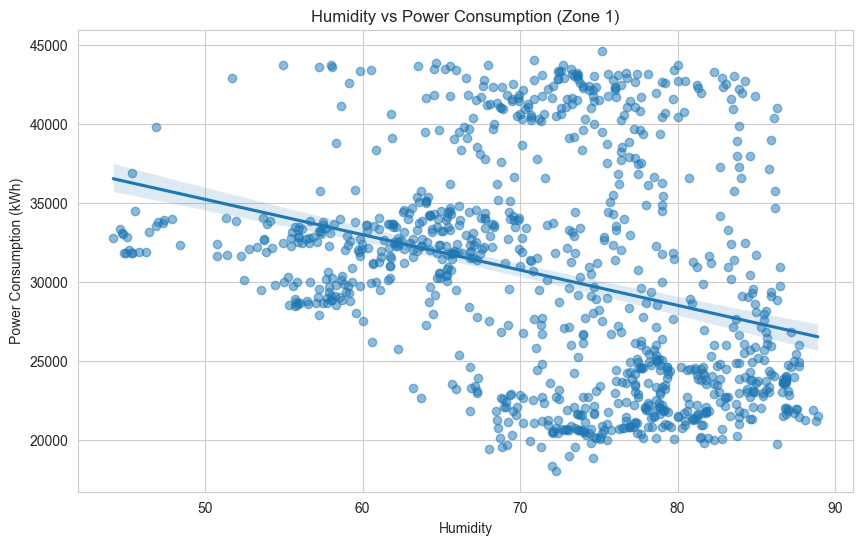

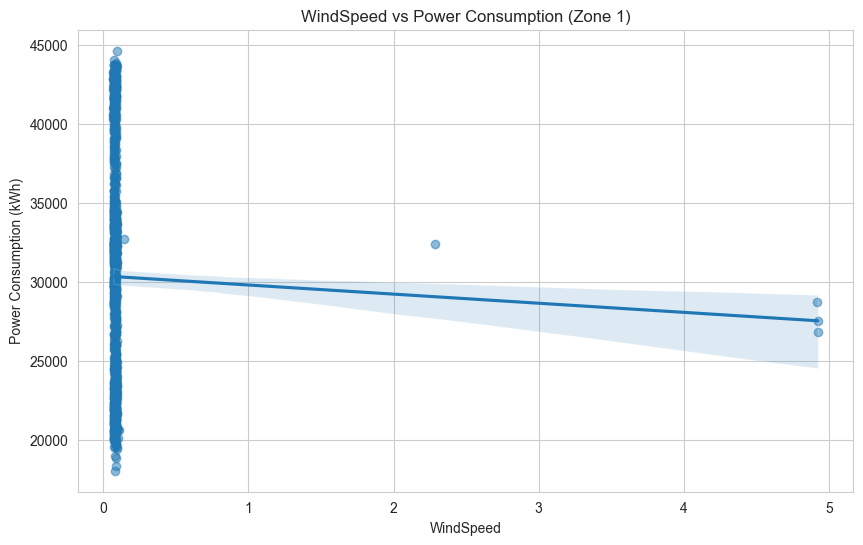

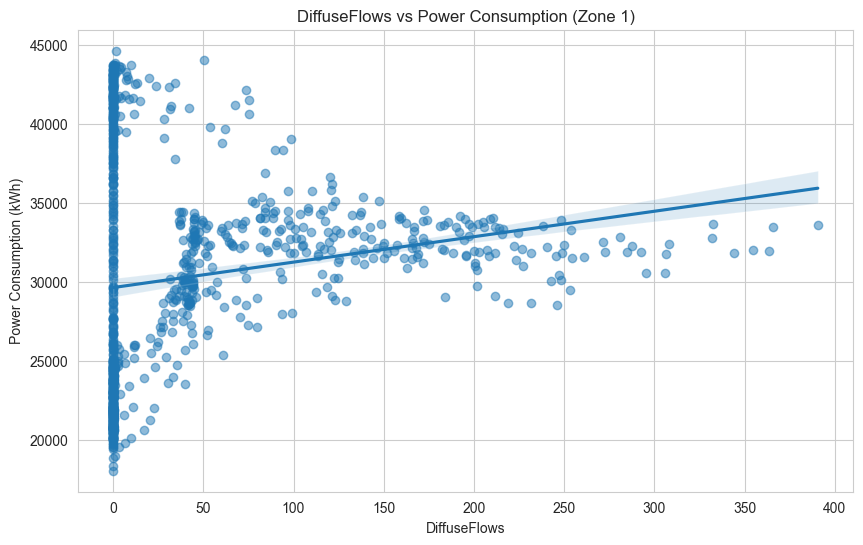

In [558]:
sns.set_style("whitegrid")
zone1_color = "#1f77b4"  

weather_factors = ["Temperature", "Humidity", "WindSpeed", "DiffuseFlows"]

for factor in weather_factors:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[factor], y=df["PowerConsumption_Zone1"], scatter_kws={"alpha":0.5}, color=zone1_color)
    plt.title(f"{factor} vs Power Consumption (Zone 1)")
    plt.xlabel(factor)
    plt.ylabel("Power Consumption (kWh)")
    plt.show()

# Zone 2

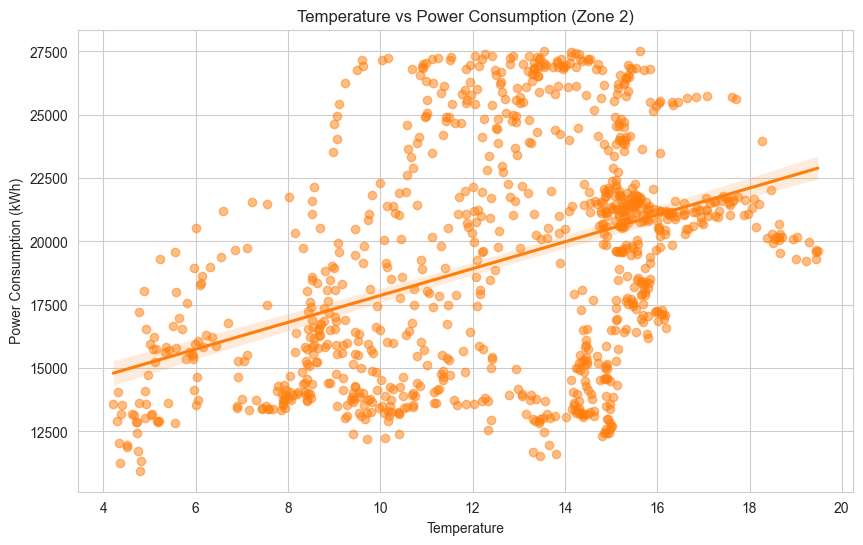

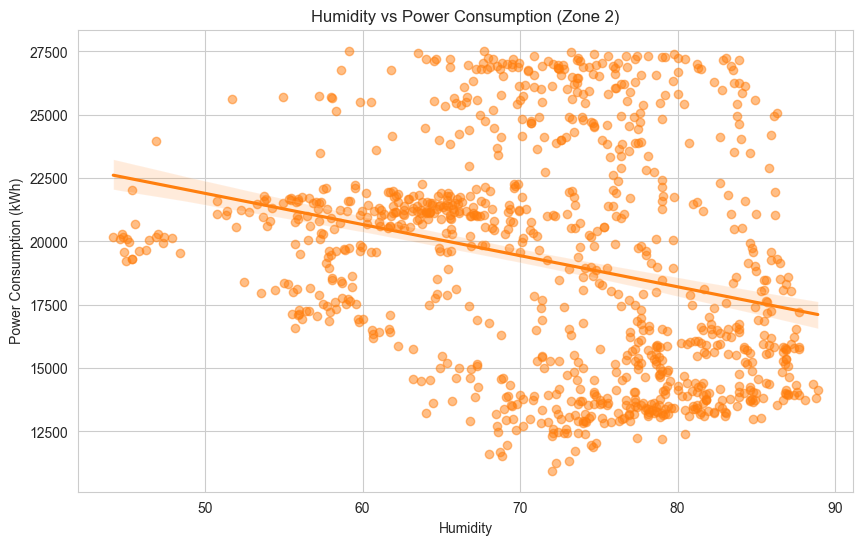

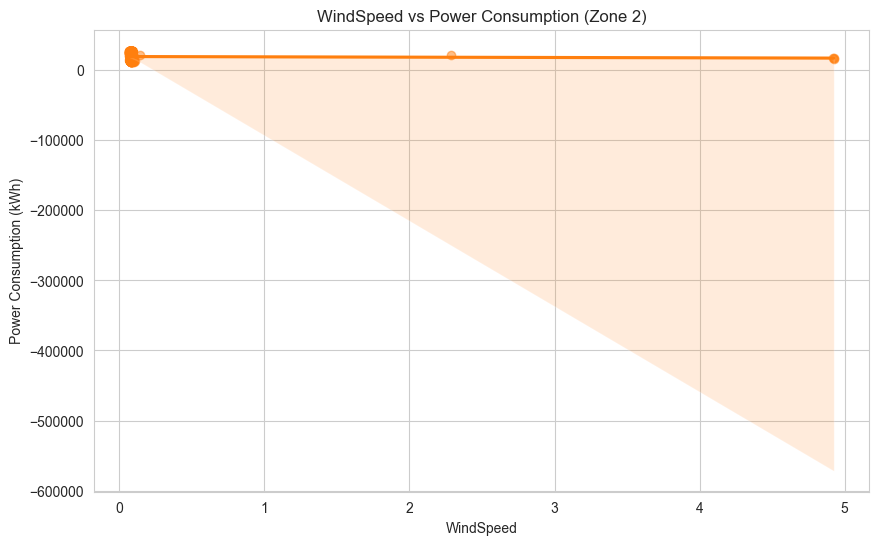

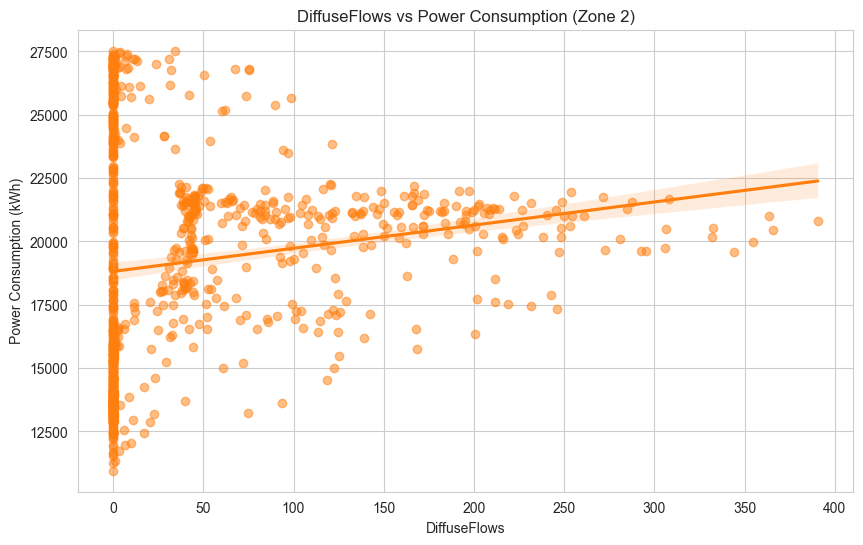

In [559]:
zone2_color = "#ff7f0e" 

for factor in weather_factors:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[factor], y=df["PowerConsumption_Zone2"], scatter_kws={"alpha":0.5}, color=zone2_color)
    plt.title(f"{factor} vs Power Consumption (Zone 2)")
    plt.xlabel(factor)
    plt.ylabel("Power Consumption (kWh)")
    plt.show()


# Zone 3

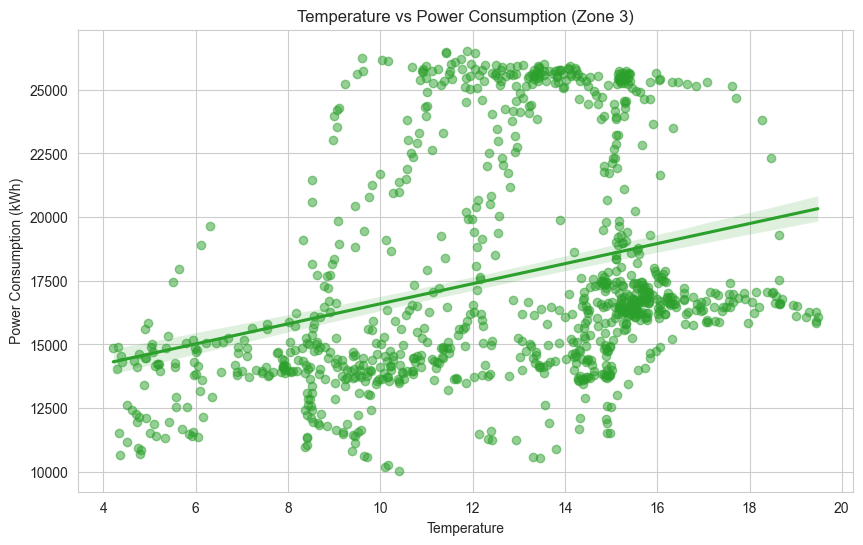

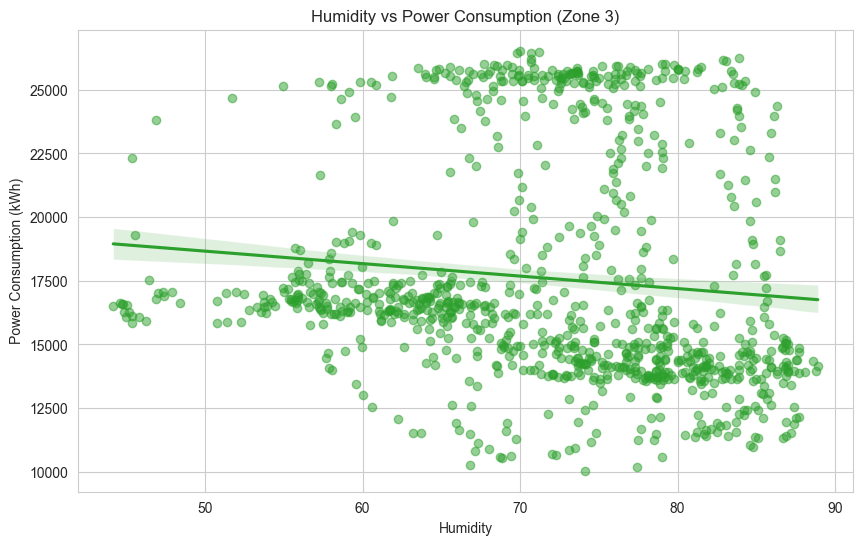

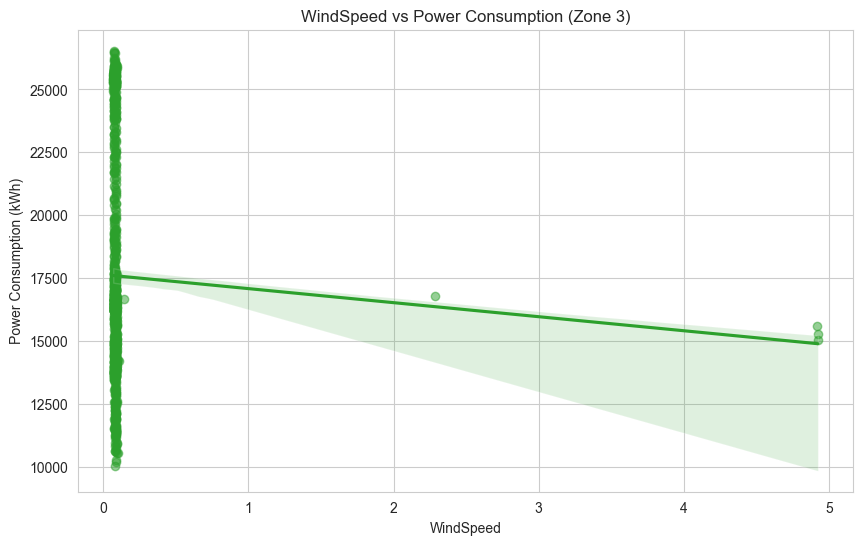

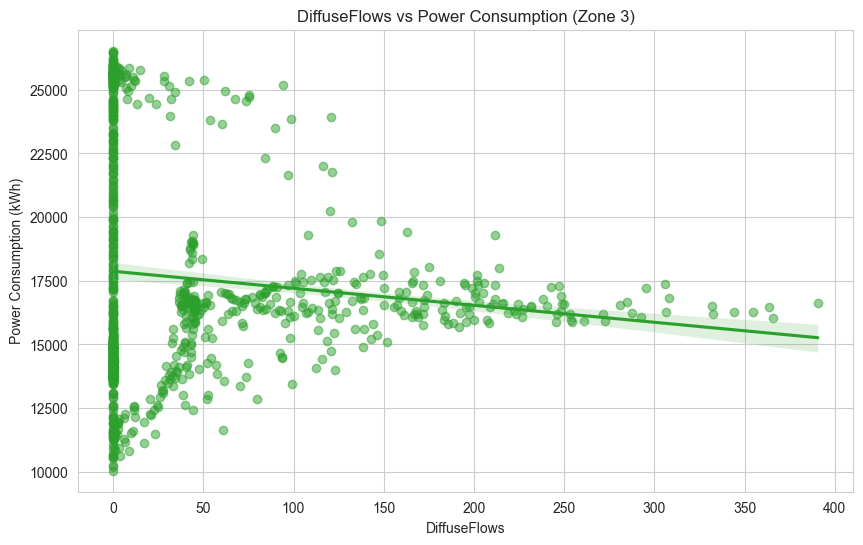

In [560]:
zone3_color = "#2ca02c"  

for factor in weather_factors:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df[factor], y=df["PowerConsumption_Zone3"], scatter_kws={"alpha":0.5}, color=zone3_color)
    plt.title(f"{factor} vs Power Consumption (Zone 3)")
    plt.xlabel(factor)
    plt.ylabel("Power Consumption (kWh)")
    plt.show()